In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

model_title = "Phi4"

mmlu_entropy_df = pd.read_csv(
    "../../../data/out/single_token_entropy/mmlu_phi4.tsv",
    sep="\t",
    header=0,
    dtype={"entropy_ans_phi3": "str"},
)

In [2]:
mmlu_entropy_df.value_counts("entropy_ans_phi3", dropna=False)

entropy_ans_phi3
1      2230
2      2032
3      1986
4      1443
6       969
5       844
7       825
8       641
9       607
10      441
NaN      12
18        1
20        1
Name: count, dtype: int64

In [3]:
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

mmlu_entropy_df = keep_only_valid_and_known_answers(mmlu_entropy_df, "entropy_ans_phi3")
mmlu_entropy_df.value_counts("entropy_ans_phi3", dropna=False)

entropy_ans_phi3
1     2230
2     2032
3     1986
4     1443
6      969
5      844
7      825
8      641
9      607
10     441
18       1
20       1
Name: count, dtype: int64

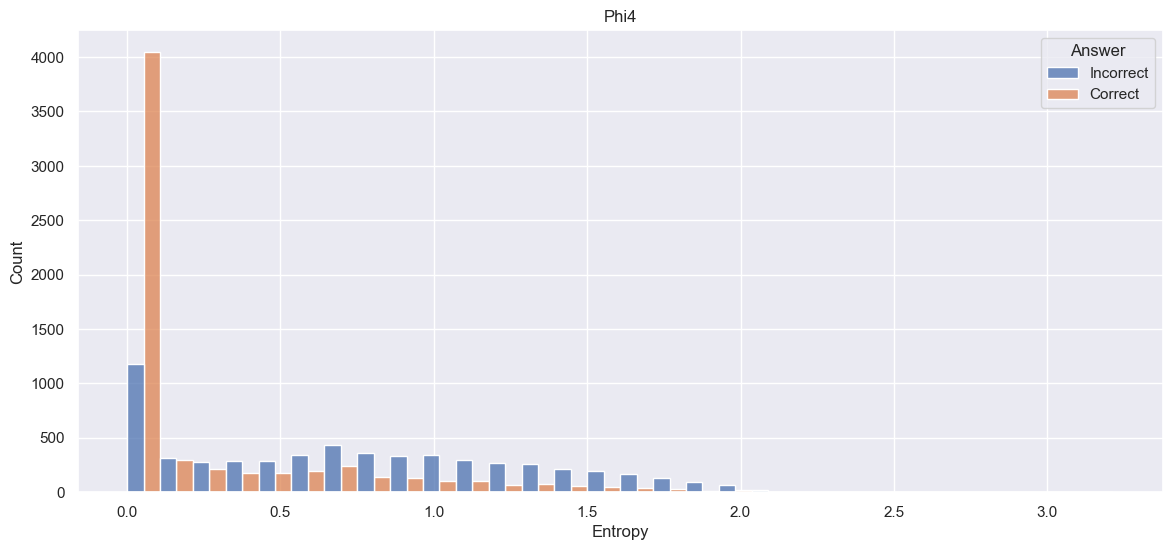

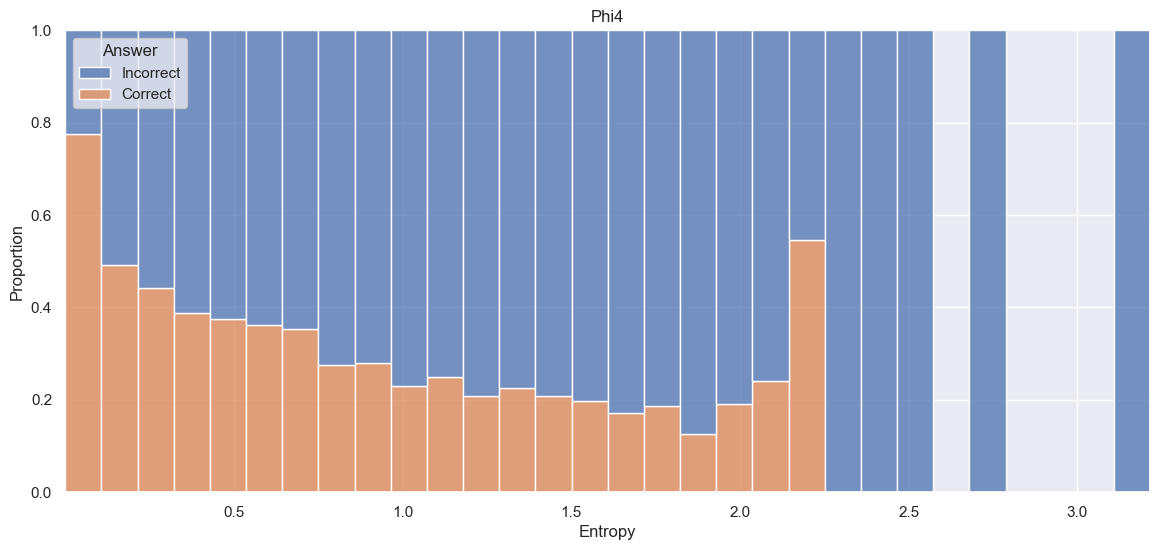

In [4]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(mmlu_entropy_df, "entropy_value_phi3", "entropy_ans_correct_phi3", model_name=model_title)

In [5]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df,
    category_col="category",
    model_answer_correct_col="entropy_ans_correct_phi3",
    score_col="entropy_value_phi3",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.795528,0.591056,12020,0.512646,Phi4,entropy_value_phi3
1,law,0.686232,0.372465,1101,0.471390,Phi4,entropy_value_phi3
2,business,0.732867,0.465734,789,0.361217,Phi4,entropy_value_phi3
3,psychology,0.835074,0.670149,798,0.741855,Phi4,entropy_value_phi3
4,chemistry,0.696759,0.393517,1132,0.344523,Phi4,entropy_value_phi3
5,biology,0.898678,0.797356,716,0.796089,Phi4,entropy_value_phi3
6,history,0.764827,0.529653,381,0.622047,Phi4,entropy_value_phi3
7,other,0.805768,0.611535,923,0.569881,Phi4,entropy_value_phi3
8,physics,0.747472,0.494945,1299,0.385681,Phi4,entropy_value_phi3
9,computer science,0.770994,0.541988,409,0.547677,Phi4,entropy_value_phi3
